In [11]:
import pandas as pd
import networkx as nx
from networkx.algorithms.bipartite.basic import density
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import random
import seaborn as sns

from random import randrange
from datetime import timedelta
from datetime import datetime
import numpy as np

In [2]:
listenings = pd.read_csv('preprocessed_data/listenings_with_years_and_users.csv',parse_dates=['timestamp','album_date'])
# no timezones needed
listenings['timestamp'] = listenings['timestamp'].dt.tz_localize(None)
listenings['album_date'] = listenings['album_date'].dt.tz_localize(None)

# we only take a look at songs released in the year 2005 and later (when the dataset begins)
listenings = listenings[listenings['album_date'].apply(lambda x: x.year)>=2005]
listenings = listenings[listenings['album_date'].apply(lambda x: x.year)!=2010]

# we create a unique identifier from artist and track name
listenings['art_tra_name'] = listenings['artname'] + '@' + listenings['traname']

# sort the listenings by time
listenings.sort_values(by='timestamp',inplace=True)
listenings.index=listenings['timestamp']
listenings.head()

,userid,timestamp,artname,traname,album_id,album_date,gender,country,art_tra_name
timestamp,,,,,,,,,
2005-02-14 11:33:33,user_000745,2005-02-14 11:33:33,Dark Tranquillity,Am I 1?,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Am I 1?
2005-02-14 11:37:23,user_000745,2005-02-14 11:37:23,Dark Tranquillity,Dry Run,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Dry Run
2005-02-14 11:41:33,user_000745,2005-02-14 11:41:33,Dark Tranquillity,Lost To Apathy,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Lost To Apathy
2005-02-14 11:45:43,user_000745,2005-02-14 11:45:43,Dark Tranquillity,Mind Matters,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Mind Matters
2005-02-14 11:50:43,user_000745,2005-02-14 11:50:43,Dark Tranquillity,My Negation,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@My Negation


In [28]:
top10Songs2005 = list(listenings[listenings['album_date'].apply(lambda x: x.year)==2006].groupby('art_tra_name').count().sort_values('userid',ascending=False)[:5].index)
top10Songs2005

['The Knife@The Captain',
 'The Knife@From Off To On',
 'Tenacious D@Beelzeboss (The Final Showdown)',
 'Hellogoodbye@Here (In Your Arms)',
 "The Kooks@You Don'T Love Me"]

In [29]:
aggregatedTop10 = listenings[listenings['art_tra_name'].isin(top10Songs2005)].groupby([pd.Grouper(freq="M"), "art_tra_name"]).count()[['userid']].reset_index()

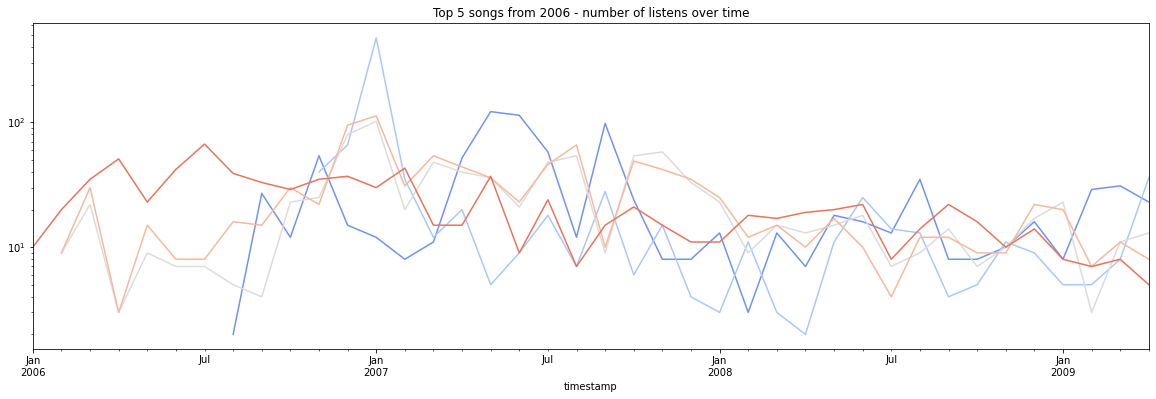

In [30]:
fig, ax= plt.subplots(figsize=(20,6))

colors = sns.color_palette("coolwarm", aggregatedTop10.art_tra_name.nunique())
ax.set_prop_cycle('color', colors)

for idx, gp in aggregatedTop10.groupby('art_tra_name'):
    gp.plot(x='timestamp', y='userid', ax=ax, legend=False)
plt.yscale('log', nonpositive='clip')
plt.title('Top 5 songs from 2006 - number of listens over time')
plt.show()

In [3]:
listenings.rename({'album_date':'release_date'},axis=1,inplace=True)

In [5]:
listenings.head()

,userid,timestamp,artname,traname,album_id,release_date,gender,country,art_tra_name
timestamp,,,,,,,,,
2005-02-14 11:33:33,user_000745,2005-02-14 11:33:33,Dark Tranquillity,Am I 1?,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Am I 1?
2005-02-14 11:37:23,user_000745,2005-02-14 11:37:23,Dark Tranquillity,Dry Run,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Dry Run
2005-02-14 11:41:33,user_000745,2005-02-14 11:41:33,Dark Tranquillity,Lost To Apathy,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Lost To Apathy
2005-02-14 11:45:43,user_000745,2005-02-14 11:45:43,Dark Tranquillity,Mind Matters,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Mind Matters
2005-02-14 11:50:43,user_000745,2005-02-14 11:50:43,Dark Tranquillity,My Negation,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@My Negation


We create a custom function evaluating the strength of the forgetting phenomenon in the dataset similar to the custom function for the preferential attachment. For each of the listenings we calculate the random probability of the song being listened to (1/nr_of_songs_that_appeared_so_far) and the probabiliy proportional to the songs age (song_age/total_age_of_all_songs). In the end we compare the sums of the different probability types- the higher the result the stronger the forgetting is in the dataset.

In [4]:
def forgetting_intensity(listenings,attrName='art_tra_name',attrFilter=None,songWise=False):

    songsAppearedSet = set() #  song_name -> song_release_Date
    totalSongAge = 0 
    randomProbList = []
    ageWeightedProbList = []
    songDict = {}

    listenedTimeBefore = listenings['timestamp'].iloc[0]
    for name,attr,listenedTime, releaseTime in tqdm(zip(listenings['art_tra_name'],listenings[attrName], listenings['timestamp'], listenings['release_date']),total=len(listenings),
                                                     position=0, leave=True):

        songAge = (listenedTime - releaseTime).total_seconds()
        # ignore if song is song age is negative
        if(songAge<0):
            continue

        # time elapsed from the last litening 
        timeElapsed = (listenedTime - listenedTimeBefore).total_seconds()
        listenedTimeBefore = listenedTime

        # all the songs got older
        totalSongAge += timeElapsed*len(songsAppearedSet)
        
        # if this was the first time for a song we add its initial age
        if(name not in songsAppearedSet):
            totalSongAge += songAge
        
        # update set of songs that appeared so far
        songsAppearedSet.add(name)

        # optional filter using datasets user attributes
        if(attrName=='art_tra_name' or attr==attrFilter):
            # completely random probability
            randomProb = 1/len(songsAppearedSet)
            # probability proportional to the song age normalized by the total age of all songs listened to so far
            ageWeightedProb = songAge / totalSongAge

            randomProbList.append(randomProb)
            ageWeightedProbList.append(ageWeightedProb)
            
            if(songWise):
                if(name in songDict):
                    songDict[name]['age'] += ageWeightedProb
                    songDict[name]['rand'] += randomProb
                else:
                    songDict[name] = {}
                    songDict[name]['age'] = 0
                    songDict[name]['rand'] = 0
    
    if (songWise):
        return songDict
    else:
        return sum(randomProbList)/sum(ageWeightedProbList)

In [9]:
listenings.head()

,userid,timestamp,artname,traname,album_id,release_date,gender,country,art_tra_name
timestamp,,,,,,,,,
2005-02-14 11:33:33,user_000745,2005-02-14 11:33:33,Dark Tranquillity,Am I 1?,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Am I 1?
2005-02-14 11:37:23,user_000745,2005-02-14 11:37:23,Dark Tranquillity,Dry Run,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Dry Run
2005-02-14 11:41:33,user_000745,2005-02-14 11:41:33,Dark Tranquillity,Lost To Apathy,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Lost To Apathy
2005-02-14 11:45:43,user_000745,2005-02-14 11:45:43,Dark Tranquillity,Mind Matters,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@Mind Matters
2005-02-14 11:50:43,user_000745,2005-02-14 11:50:43,Dark Tranquillity,My Negation,6e4c7e0b-bb52-4376-a6a1-a7d55a836f38,2005-01-19,m,NaN,Dark Tranquillity@My Negation


In [10]:
# utility funciton generates a randonm date between the specified range
def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

We test the function by generating random data of 1 million listeings of 1000 songs with corresponding listening timestamps and release dates.

In [11]:
random.seed(0)
N_DISTINCT_SONGS = 1000
N_LISTENINGS = 1000000

artTraNameTest = [random.randint(1,N_DISTINCT_SONGS) for x in range(N_LISTENINGS)]

d1 = datetime.strptime('01/01/2005 00:01', '%m/%d/%Y %H:%M')
d2 = datetime.strptime('12/31/2009 23:59', '%m/%d/%Y %H:%M')
listeningTimesTest = sorted([random_date(d1, d2) for x in range(N_LISTENINGS)])

releaseDateTestDict = {}
releaseDatesTest = []

for name,lisTime in zip(artTraNameTest,listeningTimesTest):
    if(name in releaseDateTestDict):
        releaseDatesTest.append(releaseDateTestDict[name])
    else:
        releaseDateTestDict[name] = random_date(d1, lisTime)
        releaseDatesTest.append(releaseDateTestDict[name])

testDf = pd.DataFrame()
testDf['art_tra_name'] = artTraNameTest
testDf['timestamp'] = listeningTimesTest
testDf['release_date'] = releaseDatesTest

testDf.head()

,art_tra_name,timestamp,release_date
0,865,2005-01-01 00:01:17,2005-01-01 00:01:08
1,395,2005-01-01 00:03:46,2005-01-01 00:02:58
2,777,2005-01-01 00:04:38,2005-01-01 00:04:30
3,912,2005-01-01 00:11:10,2005-01-01 00:02:12
4,431,2005-01-01 00:11:16,2005-01-01 00:01:31


In [12]:
# as expected - with random data where listenings are not related to the songs age we get a value near 1
forgetting_intensity(testDf)

100%|██████████| 1000000/1000000 [00:21<00:00, 46598.66it/s]


1.002491175190483

In [13]:
# with the actual data we see there is the forgetting phenomenon
forgetting_intensity(listenings)

100%|██████████| 1726049/1726049 [00:37<00:00, 45777.12it/s]


1.1286469934817787

# Comparing preferential attachment for subsets of the dataset based on the attributes

## User's gender

When we calculate the values for different genders in the data we can see we get a slightly bigger results for males.

In [14]:
forgetting_intensity(listenings,'gender','m')

100%|██████████| 1726049/1726049 [00:37<00:00, 46395.76it/s]


1.1549931144768377

In [15]:
forgetting_intensity(listenings,'gender','f')

100%|██████████| 1726049/1726049 [00:37<00:00, 45568.81it/s]


1.0732118900642762

## User's geographical area

In [16]:
europeList = ['United Kingdom', 'Finland', 'Germany', 'Sweden', 'Canada', 'Switzerland',
    'Norway', 'Poland', 'Netherlands', 'Belgium', 'Italy', 'Romania',
       'Russian Federation', 'Spain',
       'Ireland','Czech Republic','France', 'China',
       'Austria', 'Slovakia', 'Malta',
       'Latvia', 'Estonia', 'Lithuania',
      'Iceland', 'Bulgaria',
      'Portugal', 'Croatia',  'Serbia', 'Greece', 'Hungary',
       'Bosnia and Herzegovina', 'Slovenia',
       'Belarus',  'Macedonia']

In [17]:
# we rename the European countries so that we have a bigger geographical group which we can compare to the United States
listenings['country'] = listenings['country'].apply(lambda x: 'Europe' if x in europeList else x)

There is almost no difference between the values for users from these two different geographical areas.

In [18]:
forgetting_intensity(listenings,'country','United States')

100%|██████████| 1726049/1726049 [00:36<00:00, 47324.74it/s]


1.137491792023415

In [19]:
forgetting_intensity(listenings,'country','Europe')

100%|██████████| 1726049/1726049 [00:38<00:00, 45201.70it/s]


1.1111523318967729

## Song genres

In [36]:
listeningsWithTags = pd.read_csv('preprocessed_data/listenings_with_years_and_tags.csv',parse_dates=['timestamp','album_date'])
# no timezones needed
listeningsWithTags['timestamp'] = listeningsWithTags['timestamp'].dt.tz_localize(None)
listeningsWithTags['album_date'] = listeningsWithTags['album_date'].dt.tz_localize(None)

# we only take a look at songs released in the year 2005 and later (when the dataset begins)
listeningsWithTags = listeningsWithTags[listeningsWithTags['album_date'].apply(lambda x: x.year)>=2005]
listeningsWithTags = listeningsWithTags[listeningsWithTags['album_date'].apply(lambda x: x.year)!=2010]


# we create a unique identifier from artist and track name
listeningsWithTags['art_tra_name'] = listeningsWithTags['artname'] + '@' + listeningsWithTags['traname']
listeningsWithTags.sort_values(by='timestamp',inplace=True)
listeningsWithTags.head()

,userid,timestamp,artname,traname,album_id,album_date,tid,tag,art_tra_name
509628,user_000678,2005-02-14 12:20:30,Franz Ferdinand,Michael,875df70e-ae87-430a-9a31-c89b139eac06,2005-01-25,TRPLKZM128F9317135,indie,Franz Ferdinand@Michael
508500,user_000678,2005-02-14 12:20:30,Franz Ferdinand,Michael,875df70e-ae87-430a-9a31-c89b139eac06,2005-01-25,TRCSLZJ128F4260352,indie,Franz Ferdinand@Michael
509627,user_000678,2005-02-14 12:59:24,Franz Ferdinand,Michael,875df70e-ae87-430a-9a31-c89b139eac06,2005-01-25,TRPLKZM128F9317135,indie,Franz Ferdinand@Michael
508499,user_000678,2005-02-14 12:59:24,Franz Ferdinand,Michael,875df70e-ae87-430a-9a31-c89b139eac06,2005-01-25,TRCSLZJ128F4260352,indie,Franz Ferdinand@Michael
509626,user_000678,2005-02-14 15:50:41,Franz Ferdinand,Michael,875df70e-ae87-430a-9a31-c89b139eac06,2005-01-25,TRPLKZM128F9317135,indie,Franz Ferdinand@Michael


In [37]:
listeningsWithTags.rename({'album_date':'release_date'},axis=1,inplace=True)

In [38]:
listeningsWithTags['tag'].unique()

array(['indie', 'alternative', 'rock', 'electronic', 'pop'], dtype=object)

In [42]:
intensities = []
for tag in listeningsWithTags['tag'].unique():
    intensities.append(forgetting_intensity(listeningsWithTags[listeningsWithTags['tag']==tag]))

100%|██████████| 45667/45667 [00:01<00:00, 45005.52it/s]


Looking at the results differentiated by songs genre we can clearly see pop genre stands out from the others. Intuitively this is not so surprising as most of pop music gets usually forgotten relatively quickly.

(0.8, 1.232435211419218)

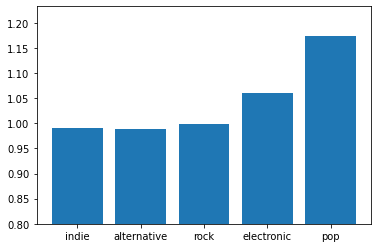

In [46]:
plt.bar(x=listeningsWithTags['tag'].unique(), height=intensities)
plt.ylim(bottom=0.8)

In [59]:
# vast majority of most popular pop songs was from 2005 which might have influenced the results
listeningsWithTags[listeningsWithTags['tag']=='rock'].groupby(['art_tra_name','release_date']).count().sort_values('userid').tail(20)

,,userid,timestamp,artname,traname,album_id,tid,tag
art_tra_name,release_date,,,,,,,
Hinder@Lips Of An Angel,2005-09-27,822,822,822,822,822,822,822
Janis Joplin@Get It While You Can,2005-06-20,854,854,854,854,854,854,854
The Fray@Little House,2005-09-13,866,866,866,866,866,866,866
Black Rebel Motorcycle Club@Howl,2005-08-23,903,903,903,903,903,903,903
Tenacious D@Beelzeboss (The Final Showdown),2006-09-26,906,906,906,906,906,906,906
Foo Fighters@Friend Of A Friend,2005-05-13,936,936,936,936,936,936,936
Foo Fighters@Cold Day In The Sun,2005-05-13,981,981,981,981,981,981,981
Foo Fighters@Hell,2005-05-13,987,987,987,987,987,987,987
Foo Fighters@Another Round,2005-05-13,1152,1152,1152,1152,1152,1152,1152


## Evergreens

We calculate forgetting values for each song. We only consider the songs with 200 total listens or more to minimize the chance of random results caused by songs with too little possbily random listens. 

In [5]:
listenedSongs = listenings.groupby('art_tra_name').count()[['timestamp']].query('timestamp > 200').index
len(listenedSongs)

752

In [8]:
res = forgetting_intensity(listenings,songWise = True)

100%|██████████| 1726049/1726049 [00:40<00:00, 42338.69it/s]


In [9]:
intensities = []
for key, value in res.items():
    if (key in listenedSongs):
        intensities.append(value['rand']/value['age'])

The top 10 least forgotten songs (the so called evergreens):

In [12]:
for i in np.argsort(intensities)[:10]:
    print (listenedSongs[i])

Regina Spektor@The Flowers
M.I.A.@Amazon
Klaxons@Four Horsemen Of 2012
Death From Above 1979@Dead Womb
Between The Buried And Me@Selkies: The Endless Obsession
65Daysofstatic@23Kid
Kasabian@I.D.
M83@Safe
Kasabian@Ovary Stripe
Iron & Wine@Jezebel


The top 10 most forgotten songs:

In [13]:
for i in np.argsort(intensities)[-10:]:
    print (listenedSongs[i])

ムック@Kagayaku Sekai
The Fray@Dead Wrong
The Decemberists@The Sporting Life
The Fray@Heaven Forbid
The Fray@All At Once
The Fray@Fall Away
The Decemberists@The Mariner'S Revenge Song
The Duke Spirit@Love Is An Unfamiliar Name
The Fray@How To Save A Life
ムック@Isho


In [14]:
listenedSongs[np.argmin(intensities)]

'Regina Spektor@The Flowers'

In [15]:
listenedSongs[np.argmax(intensities)]

'ムック@Isho'

<AxesSubplot:title={'center':'The most forgotten song'}, xlabel='timestamp'>

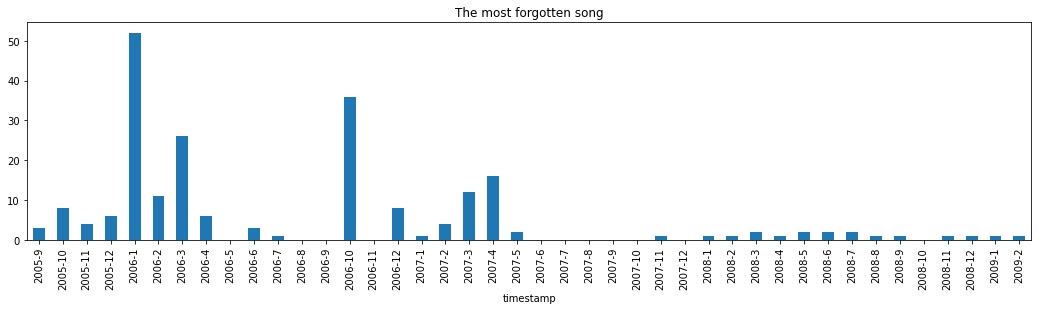

In [18]:
tmp = listenings[listenings['art_tra_name'] == listenedSongs[np.argmax(intensities)]].resample('M')[['userid']].count().reset_index().copy()
tmp['timestamp'] = tmp['timestamp'].apply(lambda x: str(x.year)) +'-' + tmp['timestamp'].apply(lambda x: str(x.month))
tmp.plot.bar(x='timestamp',y='userid',use_index=True,legend=False,figsize=(18,4), title='The most forgotten song')

<AxesSubplot:title={'center':'The least forgotten song (biggest evergreen)'}, xlabel='timestamp'>

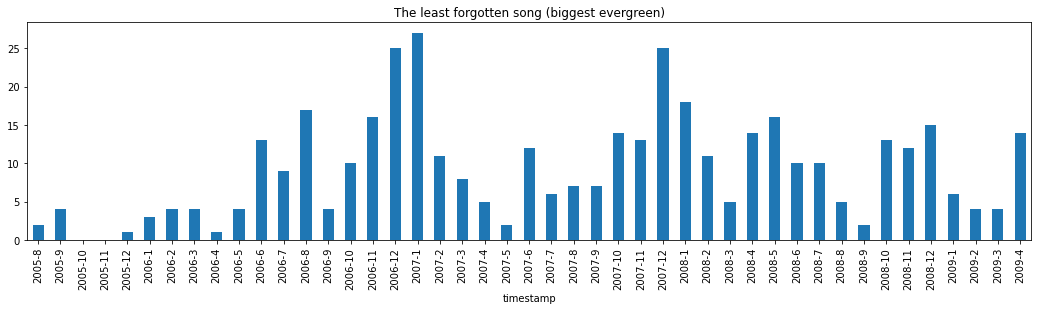

In [19]:
tmp = listenings[listenings['art_tra_name'] == listenedSongs[np.argmin(intensities)]].resample('M')[['userid']].count().reset_index().copy()
tmp['timestamp'] = tmp['timestamp'].apply(lambda x: str(x.year)) +'-' + tmp['timestamp'].apply(lambda x: str(x.month))
tmp.plot.bar(x='timestamp',y='userid',use_index=True,legend=False,figsize=(18,4), title='The least forgotten song (biggest evergreen)')